# Finding the Best Markets to advertise in

In this guided project provided by dataquest, we set out to find the best markets to advertise in for a fictional e-learning company, which offers courses on programming. Most of the courses the company provides are on web and mobile development, but the company also covers many other domains, like data science, game development, etc. 

We want to promote our product and we'd like to invest some money in advertisement.

**Our goal** in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first. Instead we can use existing surveys to achieve our goal. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). For convenience data has been downloaded locally and is also available in my github repository.

Let's get started with this data and read it in.

## Understanding the data

In [123]:
import pandas as pd
import numpy as np

# read in the csv file
survey_data = pd.read_csv("data/2017-fCC-New-Coders-Survey-Data.csv")

# print the first 5 rows
survey_data.head()

C:\Users\kamra\Miniconda3\envs\DSEnvConda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [124]:
# print # of rows and columns
survey_data.shape

(18175, 136)

The survey data is quite extensive and as we can see the dataset contains 18175 records 136 columns. We don't need all of them for our analysis. 

To understand what each of the above columns mean, we will need to refer to the [github repository](https://github.com/freeCodeCamp/2017-new-coder-survey) for freeCodeCamp's survey data. The repo contains two csv files inside `raw-data` folder. We can use these two csv's to get a better understanding of the columns.

Let's read that data in.

In [125]:
# read survey parts in
survey_part1 = pd.read_csv("data/2017-new-coder-survey-part-1.csv")
survey_part2 = pd.read_csv("data/2017-new-coder-survey-part-2.csv")

C:\Users\kamra\Miniconda3\envs\DSEnvConda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


After further investigation which, was omitted from here to keep things tidy and more readable, it's possible to observe that:
* `JobRoleInterest` column contains the roles participants would be interested in working
* `CountryCitizen`, `CountryLive` represent the country of citizenship and country where the participants currently lives respectively
* `MoneyForLearning` column represents the amount of money spent by participants from the moment they started coding until they completed the survey
* `MonthsProgramming` column represents the number of months spent by participants programming similar to above

## Checking for Sample Representativity

Most of the courses offered by the company are on web and mobile development, but they also cover many other domains like data science, game development etc. For the purposes of the analysis, we want to answer questions about a population of new coders that are interested in subjects that the we teach. We'd like to know:
* Where are these new coders located
* What are the locations with the greates number of new coders
* How much money new coders are willing to spend on learning
Nevertheless, before we start to analyze the sample, we need to clarify whether it's representative of our population of interest and it has the right categories of people for our purpose.

We will use `JobRoleInterest` column to explore the distribution of interests across our sample.

In [126]:
survey_data['JobRoleInterest'].sort_index().value_counts(normalize=True).head(30) * 100

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

Some things we can notice right away:
* Most respondents are interested in more than one subject
* Full Stack and Front-end Web developer are the two most noted subjects of interest
* Less people are interested in mobile developmenr

To paint a better picture we can visualize how many people are interested in a single subject and many have mixed interests. We will find out the frequency distribution of each of the subjects and generate a barchart to see how many respondents mentioned web or mobile development vs others.

In [127]:
# split the jobroleinterest column
jobrole_clean = survey_data['JobRoleInterest'].dropna()
jobrole_split = jobrole_clean.str.split(',')

# generate frequency table
num_options = jobrole_split.apply(len) # calculate the length of each row
num_options.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

It seems that only third (31%) of our respondents know specifically which subject they are interested, while the majority have mixed interests. This can be a good thing for us since we offer multiple courses on web and mobile development.

Now we can focus on those courses and find out how many respondents chose at least one of the web and mobile related subjects.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


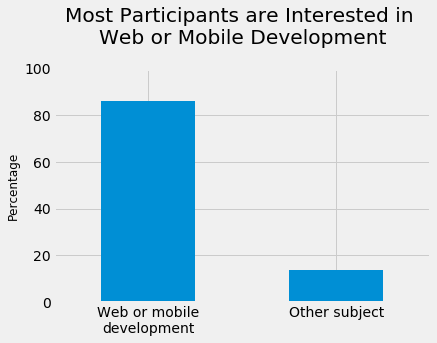

In [128]:
# Frequency table
web_or_mobile = jobrole_clean.str.contains('Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

Most participants in our sample are interested in web or mobile development, thus we can say that our sample is representative of the population we are trying to address.

## New Coders - Locations and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born. We will look at top 15 locations for readability and simplicity.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [129]:
# get a copy of the dataset with JobRoleInterest not missing
survey = survey_data[survey_data['JobRoleInterest'].notnull()].copy(deep=True)

# generate a frequency table for CountryLive
abs_rel = survey['CountryLive'].value_counts().head(15)
freq_rel = survey['CountryLive'].value_counts(normalize=True).head(15) * 100

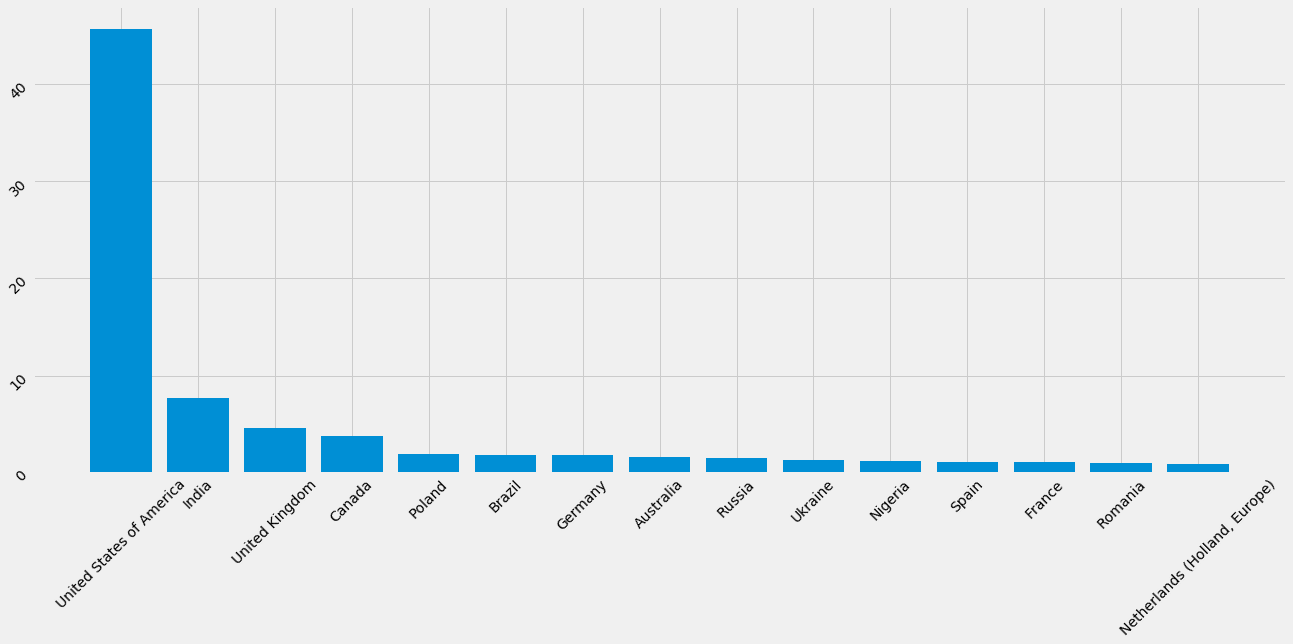

In [130]:
# plot the relative frequency
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(freq_rel.index, freq_rel)
ax.tick_params(rotation=45)

Based on the results above, we could choose US and India as primary markets to advertise in. Nevertheless, we can't stop the analysis here and we should explore our dataset in depth.

## Spending Money for Learning

We can continue our analysis by understanding how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

To make our analysis possible we need to
* Create a new column which describes the amount of money a student has spent per month. We can use `MoneyForLearning` and `MonthsProgramming`
* Remove null values in this new column to make sure our analysis is not skewed and valid
* Calculate average amoung spent by country

In [131]:
# replace values 0, where students mentioned 0 months learning programming, by 1
survey['MonthsProgramming'].replace(0, 1, inplace=True)

# generate new column
survey['MoneySpentPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
survey['MoneySpentPerMonth'].isnull().sum()

# drop null values
survey.dropna(subset=['CountryLive'], inplace=True)
survey.dropna(subset=['MoneySpentPerMonth'], inplace=True)

In [132]:
# calculate average amount spent by country
countries_mean = survey.groupby('CountryLive').agg('mean')
countries_interest = ['United States of America', 'India', 'United Kingdom', 'Canada']
countries_mean['MoneySpentPerMonth'][countries_interest]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64

## Dealing with Extreme Outliers

From the results, we can see that something is off. If we consider other indicators such as GDP, we could intuitively claim that participants from UK should be able to spend more on learning on average than in India. We need to investigate this further to find out the reasons behind this anomaly.

It might be that this is due to some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. It might also be that the results are correct.

To find out whether there are any outliers, we will use a boxplot to visualize the distribution of the money spent for each country.

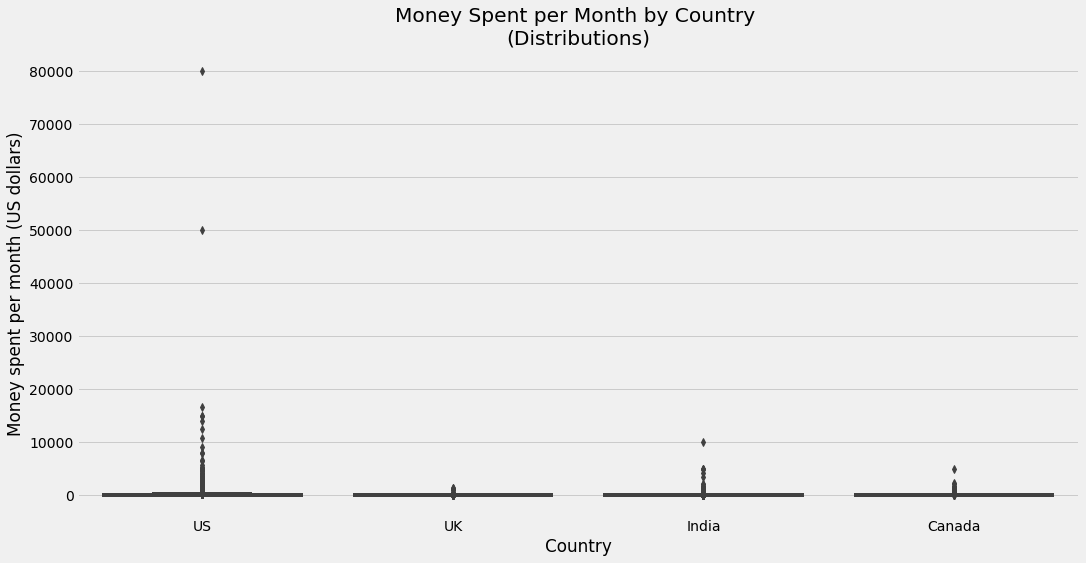

In [141]:
# filter only countries of interest
survey = survey[survey['CountryLive'].isin(countries_interest)]

# generate a boxplot
import seaborn as sns
plt.figure(figsize=(16,8))
sns.boxplot(data=survey, x='CountryLive', y='MoneySpentPerMonth')
plt.title("Money Spent per Month by Country \n(Distributions)")
plt.xlabel('Country')
plt.ylabel('Money spent per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see right away that there are at least two outliers for USA where the monthly expense is 50000 and 80000 USD. Let's isolate these rows and have a look at those.

In [142]:
survey[survey['MoneySpentPerMonth'] > 40000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,trans,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,b84e33311d235660ad1b7a918d7d7df4,b3229f43317af29a4d23734f9d543222,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,English,"single, never married",100000.0,2.0,befcbda814,2017-03-10 23:30:16,2017-03-10 23:26:33,2017-03-10 23:31:50,2017-03-10 23:30:19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,48000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,30000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,20.0,11d884a40e5662ef57566556206b7754,4f77cc788154cb155fb513ece8ea40da,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,work for a nonprofit,0.0,"Back-End Web Developer, Front-End Web Develo...",in an office with other developers,English,"single, never married",80000.0,1.0,b01f8f18a7,2017-03-16 23:14:34,2017-03-16 23:09:32,2017-03-16 23:16:45,2017-03-16 23:14:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

These values are obviously outliers, which could be the case of wrong response. Both of these participants are unemployed and quite a bit of information is missing on them. Let's remove these values, regenerate the boxplot and recompute the means.

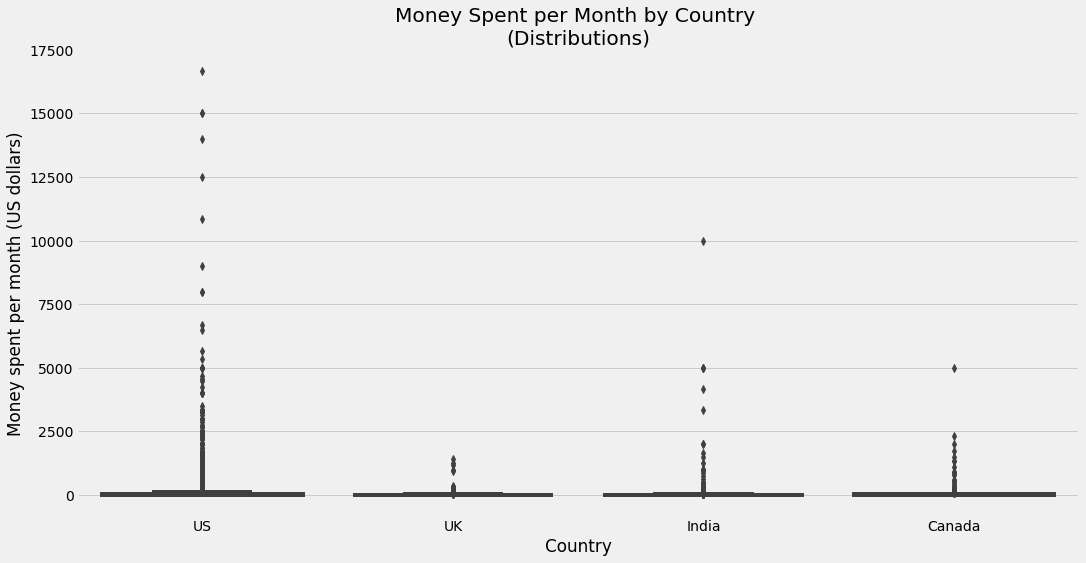

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonth, dtype: float64

In [146]:
# filter only monthly expense of less than 40000 USD
survey = survey[survey['MoneySpentPerMonth'] < 40000]

# generate a boxplot
import seaborn as sns
plt.figure(figsize=(16,8))
sns.boxplot(data=survey, x='CountryLive', y='MoneySpentPerMonth')
plt.title("Money Spent per Month by Country \n(Distributions)")
plt.xlabel('Country')
plt.ylabel('Money spent per month (US dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# recompute the means
survey.groupby('CountryLive')['MoneySpentPerMonth'].agg('mean')

The concern we raised earlier is still present, such that UK and India values seem out of place. Actually, if we look at the distribution of spending in India in the boxplot, we can see that few participants spend more than 2500 USD per month which is quite a lot taking India's GDP and average earn into account. We can isolate this case and have a look.

In [153]:
survey[(survey['MoneySpentPerMonth'] >= 2500) & (survey['CountryLive'] == 'India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0

These participants have not attended any botcamp and many of them are unemployed, thus these values seem unlikely and possibly an error or misunderstanding when providing response to the question of money spent. Let's remove these values as well and recalculate the means.

In [155]:
# get indices of these values and drop them
india_particips = survey[(survey['MoneySpentPerMonth'] >= 2500) & (survey['CountryLive'] == 'India')]
survey.drop(india_particips.index, inplace=True)

# recompute the means
survey.groupby('CountryLive')['MoneySpentPerMonth'].agg('mean')

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonth, dtype: float64

We can also address a single outlier for Canada where a participant spent 5000 USD per month.

In [156]:
survey[(survey['MoneySpentPerMonth'] >= 5000) & (survey['CountryLive'] == 'Canada')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We can remove this person as well, using a similar explanation described above, and then we can recompute the means along with the boxplots.

In [157]:
# get indices of these values and drop them
canada_particips = survey[(survey['MoneySpentPerMonth'] >= 5000) & (survey['CountryLive'] == 'Canada')]
survey.drop(canada_particips.index, inplace=True)

# recompute the means
survey.groupby('CountryLive')['MoneySpentPerMonth'].agg('mean')

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonth, dtype: float64

## Choosing the Two Best Markets

Now that we have enough information on our markets we can choose which markets would be best to advertise in. Obviously, the first market is USA. Customers there would be willing to spend 183 USD on average, while Canada seems like a good second option with 93 USD average expenditure per month by prospective customers. Nevertheless, one thing to keep in mind when making this decision is the number of customers and the market size. While Canada has a higher average expense per month India is not far away with 65 USD per month, but India has much bigger market thus higher chance of getting customers to subscribe to our platform. While we can go about various options in terms spending our advertising budget proportionally across US, Canada or India, it would be best to send these results to the marketing team so that they use their domain knowledge to make the final decision.

## Conclusions

In this guided project, we analyzed survey data from new coders to find the best markets to advertise our products in. While it was clear that USA is the first market we need to advertise in, the choice of the second market is slightly more challenging. Thus we decided to send the results to the marketing team so that they can use their domain expertise to make the best decision.